Import necessary libraries
==========================

In [47]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

Data Loading and Basic Checks
=============================

In [48]:
data = pd.read_csv('/Users/gmelath/Desktop/Learnings/AI:ML/Berkley/Module-20/Subscription_Service.csv')

In [49]:
data.head()

,CITY,INTERNET_PROVIDER,MODEL_NAME,ID,OWNS_APPLE_PRODUCT,WANIPREGION,AUTO_RENEW,YEARS_OF_SUBSCRIPTION,LAST_AMOUNT_PAID,ARMOR_SECURITY_DASHBOARD_VISITS,...,SMARTPHONES_CONNECTED_OTHER,THREATS_BLOCKED,APP_SESSION_DURATION,PAYING_FLAG,PING_DAYS_DIFF,START_FIRST_PING_DIFF,END_LAST_PING_DIFF,SNAPSHOT_DATE_LAST_PING_DIFF,PUSH_NOTIF_COUNT,INAPP_NOTIF_COUNT
0,Brooklyn,Optimum Online,KBK50,49841561,51.0,NY,1,NaN,NaN,0,...,2425,40.0,38879.0,0,303.0,0.0,61.0,24.0,5.0,0.0
1,Kingwood,Optimum,PAX30,88426823,0.0,TX,1,0.0,30.00,6,...,0,23.0,5819100.0,0,303.0,0.0,61.0,2.0,0.0,0.0
2,Houston,AT&T Internet Services,KAX70,37510298,NaN,TX,0,1.0,99.99,0,...,0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0
3,NaN,NaN,KBK50V2,51906313,NaN,NaN,1,NaN,NaN,0,...,172,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0
4,Fenton,Spectrum,KBK50,89468581,12.0,MO,1,0.0,30.00,5,...,624,251.0,7521500.0,0,240.0,63.0,61.0,16.0,7.0,0.0


In [50]:
# Basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139889 entries, 0 to 139888
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   CITY                             127077 non-null  object 
 1   INTERNET_PROVIDER                127962 non-null  object 
 2   MODEL_NAME                       139880 non-null  object 
 3   ID                               139889 non-null  int64  
 4   OWNS_APPLE_PRODUCT               99824 non-null   float64
 5   WANIPREGION                      127712 non-null  object 
 6   AUTO_RENEW                       139889 non-null  int64  
 7   YEARS_OF_SUBSCRIPTION            135565 non-null  float64
 8   LAST_AMOUNT_PAID                 135605 non-null  float64
 9   ARMOR_SECURITY_DASHBOARD_VISITS  139889 non-null  int64  
 10  LOCAL_PROTECTION_DEVICES         139889 non-null  int64  
 11  PLAN_NAME                        139889 non-null  object 
 12  TO

In [51]:
# Checking for missing values
print(data.isnull().sum())

CITY                               12812
INTERNET_PROVIDER                  11927
MODEL_NAME                             9
ID                                     0
OWNS_APPLE_PRODUCT                 40065
WANIPREGION                        12177
AUTO_RENEW                             0
YEARS_OF_SUBSCRIPTION               4324
LAST_AMOUNT_PAID                    4284
ARMOR_SECURITY_DASHBOARD_VISITS        0
LOCAL_PROTECTION_DEVICES               0
PLAN_NAME                              0
TOTAL_DAYS                             0
SMARTPHONES_CONNECTED_OTHER            0
THREATS_BLOCKED                    33619
APP_SESSION_DURATION               19535
PAYING_FLAG                            0
PING_DAYS_DIFF                     16918
START_FIRST_PING_DIFF              16918
END_LAST_PING_DIFF                 16918
SNAPSHOT_DATE_LAST_PING_DIFF       16918
PUSH_NOTIF_COUNT                       0
INAPP_NOTIF_COUNT                      0
dtype: int64


In [52]:
# Checking basic statistics
print(data.describe())

                 ID  OWNS_APPLE_PRODUCT     AUTO_RENEW  YEARS_OF_SUBSCRIPTION  \
count  1.398890e+05        99824.000000  139889.000000          135565.000000   
mean   6.794454e+07            8.891850       0.870612               0.731140   
std    3.240961e+07           14.643821       0.335630               0.738432   
min    8.600000e+01            0.000000       0.000000               0.000000   
25%    5.001992e+07            0.000000       1.000000               0.000000   
50%    7.839389e+07            2.000000       1.000000               1.000000   
75%    9.373625e+07           10.000000       1.000000               1.000000   
max    1.070531e+08          122.000000       1.000000               3.000000   

       LAST_AMOUNT_PAID  ARMOR_SECURITY_DASHBOARD_VISITS  \
count     135605.000000                    139889.000000   
mean          58.185074                        13.357083   
std           29.027019                        27.166267   
min            0.000000       

Handling Missing Values
=======================

In [53]:
# Fill missing values for numerical columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Fill missing values for categorical columns with mode or a specific value
categorical_columns = data.select_dtypes(include=[object]).columns
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Verify no missing values are left
print(data.isnull().sum())


CITY                               0
INTERNET_PROVIDER                  0
MODEL_NAME                         0
ID                                 0
OWNS_APPLE_PRODUCT                 0
WANIPREGION                        0
AUTO_RENEW                         0
YEARS_OF_SUBSCRIPTION              0
LAST_AMOUNT_PAID                   0
ARMOR_SECURITY_DASHBOARD_VISITS    0
LOCAL_PROTECTION_DEVICES           0
PLAN_NAME                          0
TOTAL_DAYS                         0
SMARTPHONES_CONNECTED_OTHER        0
THREATS_BLOCKED                    0
APP_SESSION_DURATION               0
PAYING_FLAG                        0
PING_DAYS_DIFF                     0
START_FIRST_PING_DIFF              0
END_LAST_PING_DIFF                 0
SNAPSHOT_DATE_LAST_PING_DIFF       0
PUSH_NOTIF_COUNT                   0
INAPP_NOTIF_COUNT                  0
dtype: int64


In [54]:
data.head()

,CITY,INTERNET_PROVIDER,MODEL_NAME,ID,OWNS_APPLE_PRODUCT,WANIPREGION,AUTO_RENEW,YEARS_OF_SUBSCRIPTION,LAST_AMOUNT_PAID,ARMOR_SECURITY_DASHBOARD_VISITS,...,SMARTPHONES_CONNECTED_OTHER,THREATS_BLOCKED,APP_SESSION_DURATION,PAYING_FLAG,PING_DAYS_DIFF,START_FIRST_PING_DIFF,END_LAST_PING_DIFF,SNAPSHOT_DATE_LAST_PING_DIFF,PUSH_NOTIF_COUNT,INAPP_NOTIF_COUNT
0,Brooklyn,Optimum Online,KBK50,49841561,51.00000,NY,1,0.73114,58.185074,0,...,2425,40.000000,3.887900e+04,0,303.000000,0.000000,61.000000,24.000000,5.0,0.0
1,Kingwood,Optimum,PAX30,88426823,0.00000,TX,1,0.00000,30.000000,6,...,0,23.000000,5.819100e+06,0,303.000000,0.000000,61.000000,2.000000,0.0,0.0
2,Houston,AT&T Internet Services,KAX70,37510298,8.89185,TX,0,1.00000,99.990000,0,...,0,1509.342872,1.585230e+07,0,275.266177,8.361191,85.543396,-8.309699,0.0,0.0
3,Sydney,Spectrum,KBK50V2,51906313,8.89185,CA,1,0.73114,58.185074,0,...,172,1509.342872,1.585230e+07,0,275.266177,8.361191,85.543396,-8.309699,0.0,0.0
4,Fenton,Spectrum,KBK50,89468581,12.00000,MO,1,0.00000,30.000000,5,...,624,251.000000,7.521500e+06,0,240.000000,63.000000,61.000000,16.000000,7.0,0.0


Handling Categorical Variables
==============================

In [55]:
# List of categorical columns
categorical_columns = ['CITY', 'INTERNET_PROVIDER', 'MODEL_NAME', 'WANIPREGION', 'PLAN_NAME']

# Apply Label Encoding
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])



Exploratory Data Analysis (EDA)
==============================

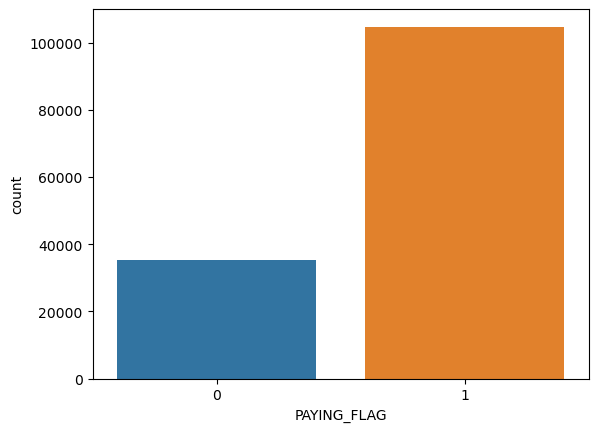

In [56]:
# Distribution of the target variable
sns.countplot(x='PAYING_FLAG', data=data)
plt.show()

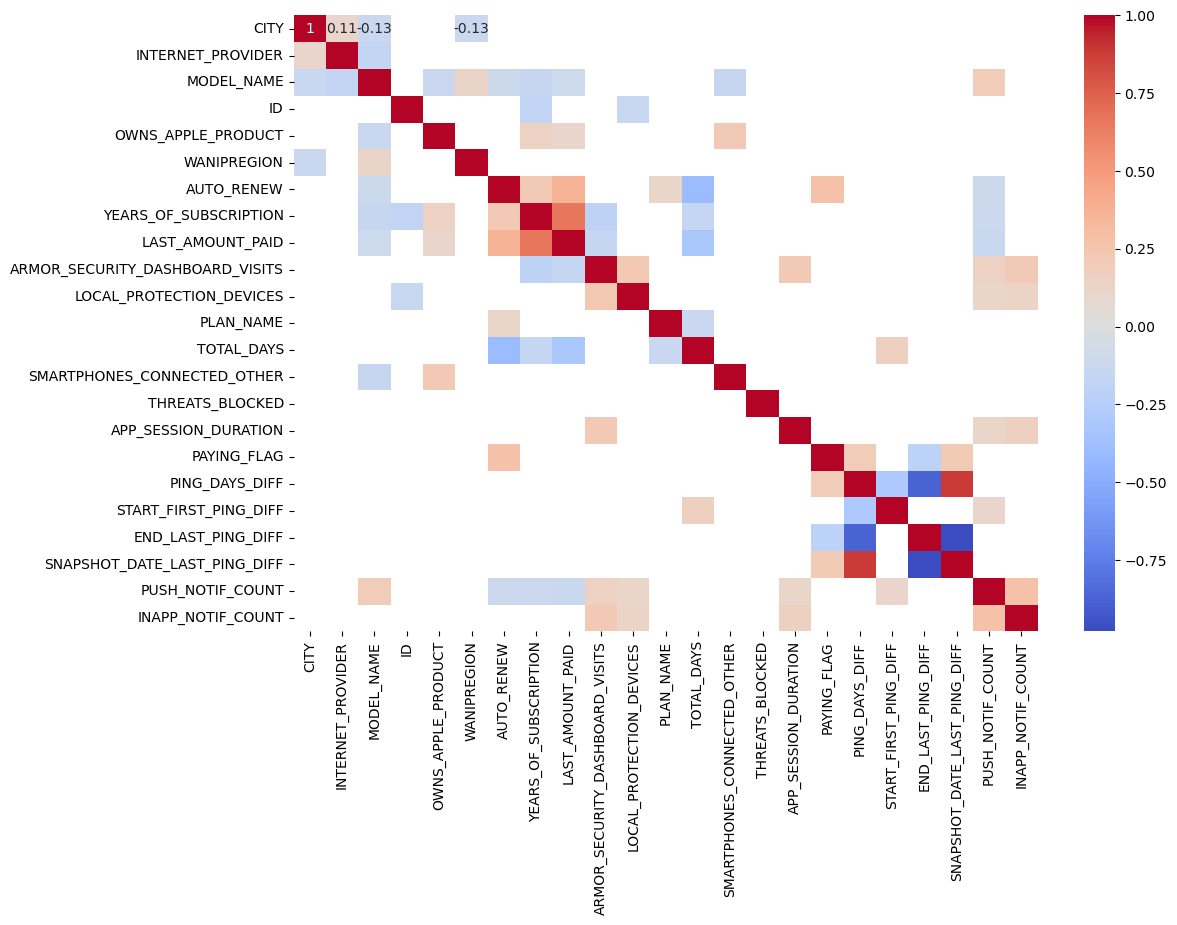

In [57]:
# Correlation matrix
warnings.simplefilter(action='ignore', category=FutureWarning)
threshold = 0.1
plt.figure(figsize=(12,8))
filtered_corr = data.corr()[(data.corr() >= threshold) | (data.corr() <= -threshold)]
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm')
plt.show()

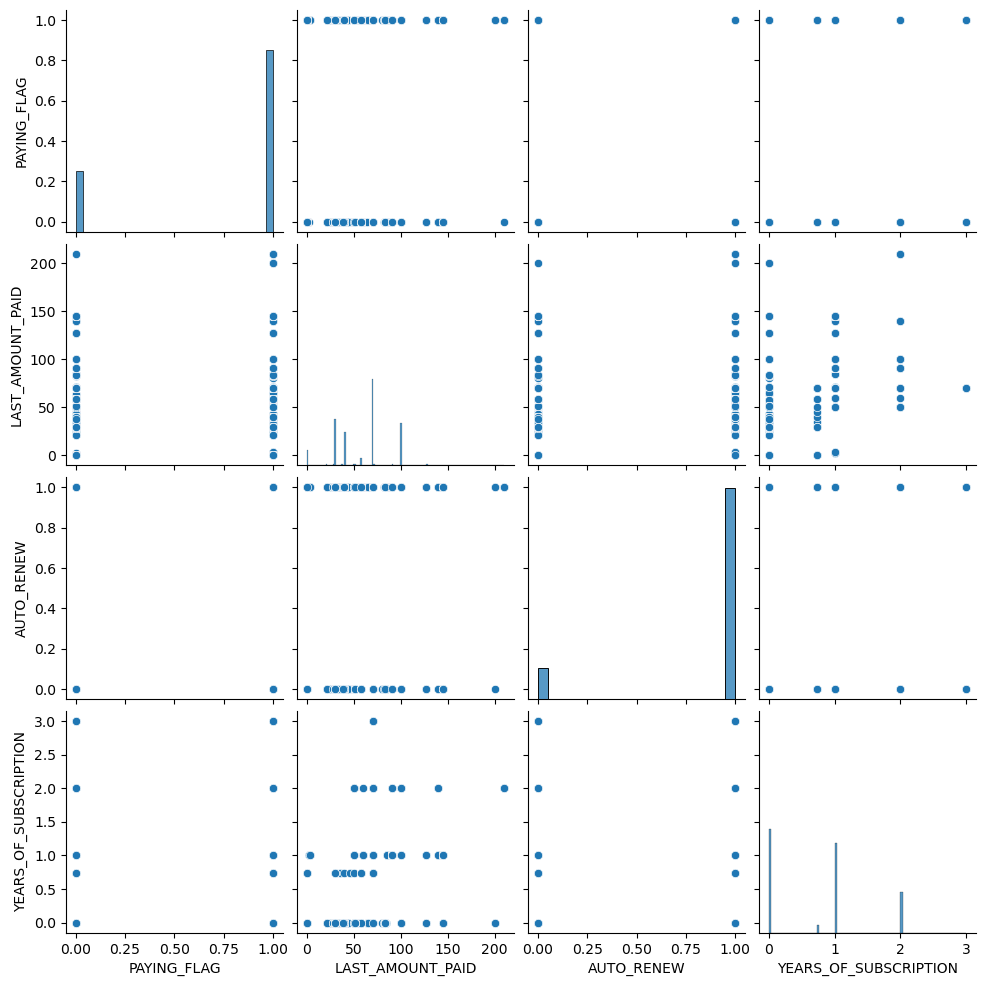

In [58]:
# Pairplot to visualize distributions and relationships
sns.pairplot(data[['PAYING_FLAG', 'LAST_AMOUNT_PAID', 'AUTO_RENEW', 'YEARS_OF_SUBSCRIPTION']])
plt.show()

Feature Importance Using Tree-Based Models
==========================================

In [59]:
# Define X and y
X = data.drop(['PAYING_FLAG','ID'], axis=1)
y = data['PAYING_FLAG']

# Train a RandomForest to compute feature importance
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

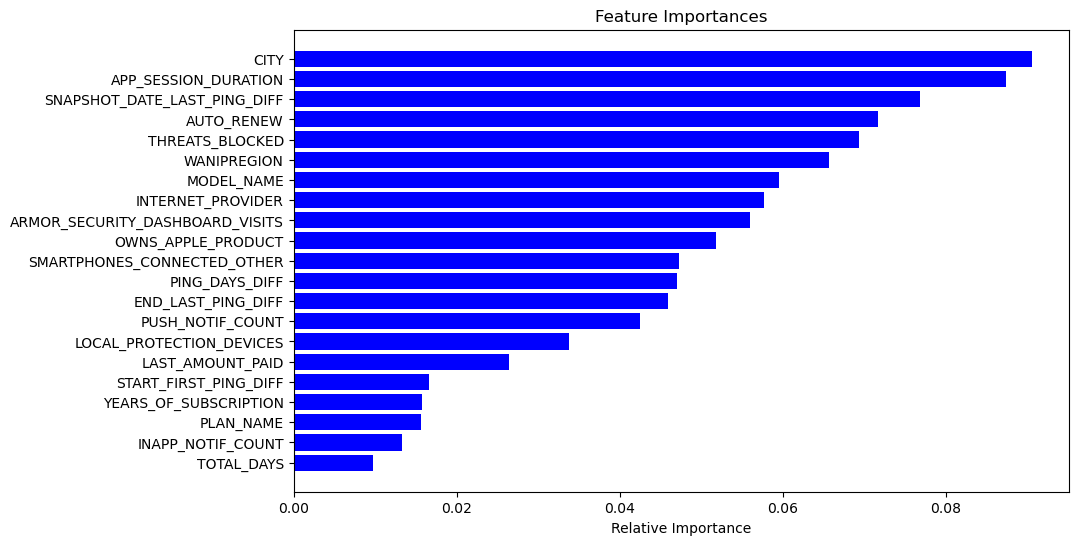

In [60]:
# Plot feature importance
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Dimensionality Reduction with PCA
================================

In [62]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=5)  # Choose the number of components
X_pca = pca.fit_transform(X_scaled)

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.1380243  0.11527994 0.07489419 0.06420874 0.0593137 ]


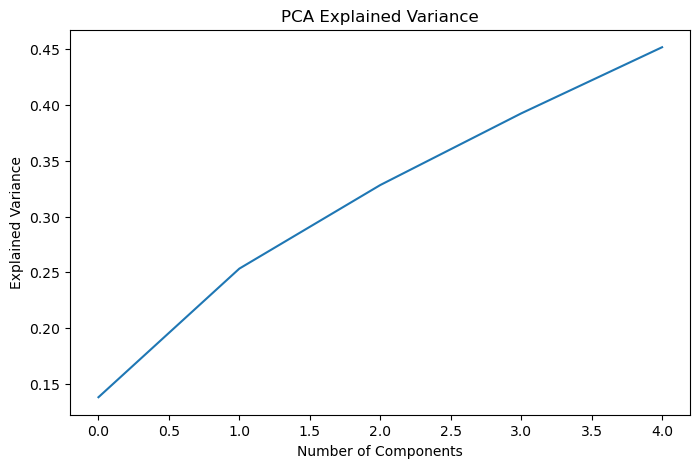

In [63]:
# Visualize the explained variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

Model Training and Comparison
=============================


Model: Logistic Regression
Accuracy: 0.2500297853075035
Classification Report:
               precision    recall  f1-score   support

           0       0.25      1.00      0.40     10493
           1       0.50      0.00      0.00     31474

    accuracy                           0.25     41967
   macro avg       0.38      0.50      0.20     41967
weighted avg       0.44      0.25      0.10     41967

Confusion Matrix:
 [[10491     2]
 [31472     2]]


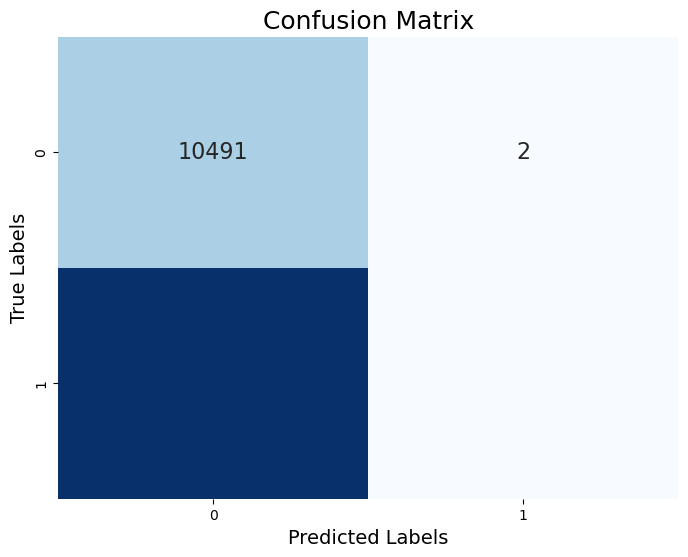

------------------------------------------------------------

Model: Random Forest
Accuracy: 0.7793266137679605
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.40      0.47     10493
           1       0.82      0.91      0.86     31474

    accuracy                           0.78     41967
   macro avg       0.70      0.65      0.67     41967
weighted avg       0.76      0.78      0.76     41967

Confusion Matrix:
 [[ 4147  6346]
 [ 2915 28559]]


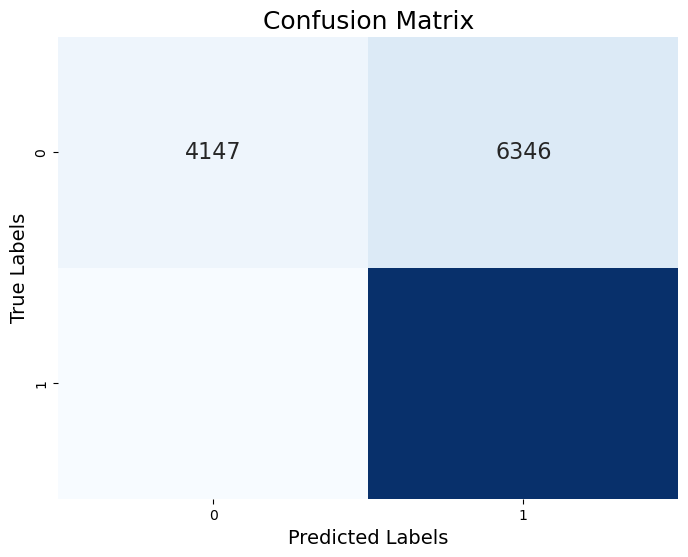

------------------------------------------------------------

Model: SVM
Accuracy: 0.5291062024924346
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.52      0.35     10493
           1       0.77      0.53      0.63     31474

    accuracy                           0.53     41967
   macro avg       0.52      0.53      0.49     41967
weighted avg       0.64      0.53      0.56     41967

Confusion Matrix:
 [[ 5426  5067]
 [14695 16779]]


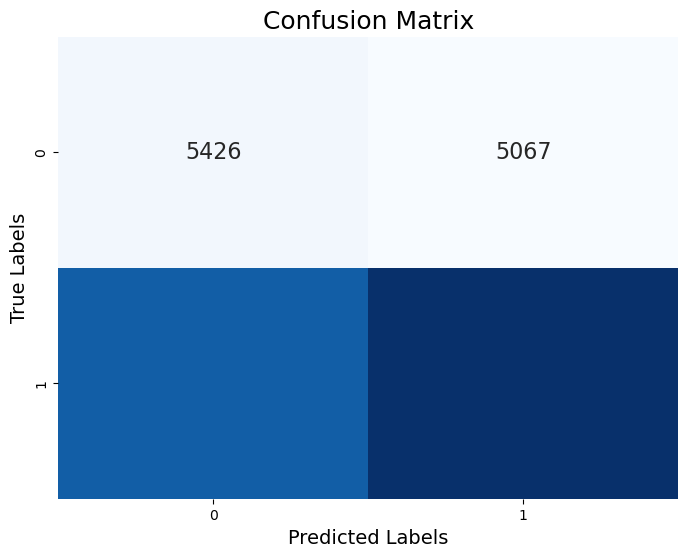

------------------------------------------------------------


In [73]:
# Split data into training and testing sets (30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE oversampling to address potential class imbalance
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Define classifiers with balanced class weights
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'SVM': SVC(class_weight='balanced')
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    
    # Plot confusion matrix with Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 16})

    # Add labels and title for the confusion matrix
    plt.title('Confusion Matrix', fontsize=18)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.show()

    print("-" * 60)

Hyperparameter Tuning Using GridSearchCV to fine-tune the best-performing model
==============================================================================

In [72]:
# Example for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.7944180027023149
